# Zillow Clustering Project

Lupe Luna  |  June 28, 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
import scipy.stats as stats
import viz
from sklearn.cluster import KMeans
import acquire
import prepare
import explore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
import math
from sklearn.metrics import explained_variance_score


# acquire
from env import host, user, password
from pydataset import data

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

## Project Summary

### Overview
   *  Acquire Zillow dataset for properties_2017
    *  Clean and prep data for exploration and modeling
    *  Identify the driver for logerror (Zestimate errors)
    *  See if clustering improved the models


### Goal

   * Identify the drivers for errors in Zestimates by incorporating clustering methodologies.
    *  Document the process and analysis throughout the data science pipeline.
    *  Demonstrate our process and articulate the information that was discovered. Deliverables:
    *  README.md file containing overall project information, how to reproduce work, and notes from project planning.
    *  Jupyter Notebook Report detailing the pipeline process.
    *  Python modules that automate the data acquistion, preparation, and exploration process.

## Acquire Zillow Data
Here I will acquire the properties_2017 from the Zillow database.
 * pull the data and see the information that we are working with on the data pulled
 * Completed data summarization (.shape, .value_counts(), .info())
 * Review the information regarding data types and see if we are missing data by checking for null values
 * Describe the dataset (quick snapshot showing stats on columns w/ numeric data types)
 * Plot a few histograms to get a look at the distribution of some of our variables

In [2]:
# Acquire Zillow Data
df = acquire.get_zillow_data()
df.head(3)

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,14297519,0.025595,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72
1,17052889,0.055619,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48
2,14186244,0.005383,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30


In [3]:
df.describe()

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
count,5.244200e+04,52442.000000,52442.000000,52442.000000,52360.000000,52442.000000,5.244200e+04,5.244200e+04,5.207300e+04,51405.000000,52442.000000,52416.000000,52326.000000,5.235800e+04,5.244100e+04,5.244100e+04,52438.000000
mean,1.299912e+07,0.018294,2.299397,3.300675,1922.874083,6049.131917,3.402254e+07,-1.181942e+08,1.133952e+04,33503.090225,2524.598642,96635.843559,1963.393820,1.965315e+05,5.296830e+05,3.334626e+05,6453.451945
std,3.411412e+06,0.177502,1.022764,0.949086,1004.363491,21.028933,2.739761e+05,3.566615e+05,8.674680e+04,49176.135422,803.986272,4605.063649,23.133355,2.543382e+05,7.518883e+05,5.705227e+05,8755.495483
min,1.071186e+07,-4.655420,0.000000,0.000000,128.000000,6037.000000,3.334062e+07,-1.194754e+08,2.360000e+02,3491.000000,1286.000000,95982.000000,1878.000000,1.290000e+02,1.000000e+03,1.610000e+02,49.180000
25%,1.151030e+07,-0.024639,2.000000,3.000000,1268.000000,6037.000000,3.382691e+07,-1.184007e+08,5.583000e+03,12447.000000,1286.000000,96206.000000,1950.000000,7.707175e+04,1.937500e+05,7.602600e+04,2656.250000
50%,1.257766e+07,0.007010,2.000000,3.000000,1659.000000,6037.000000,3.402377e+07,-1.181531e+08,6.840000e+03,24812.000000,3101.000000,96412.000000,1961.000000,1.318070e+05,3.736120e+05,2.180250e+05,4647.730000
75%,1.412951e+07,0.040691,3.000000,4.000000,2306.000000,6059.000000,3.418715e+07,-1.179292e+08,8.798000e+03,40227.000000,3101.000000,96995.000000,1979.000000,2.263198e+05,6.193010e+05,4.086000e+05,7377.445000
max,1.676878e+08,5.262999,18.000000,14.000000,21929.000000,6111.000000,3.481877e+07,-1.175546e+08,6.971010e+06,396556.000000,3101.000000,399675.000000,2016.000000,9.164901e+06,4.906124e+07,4.895220e+07,586639.300000


In [4]:
df.shape

(52442, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52442 non-null  int64  
 1   logerror                      52442 non-null  float64
 2   bathroomcnt                   52442 non-null  float64
 3   bedroomcnt                    52442 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   fips                          52442 non-null  float64
 6   latitude                      52442 non-null  float64
 7   longitude                     52442 non-null  float64
 8   lotsizesquarefeet             52073 non-null  float64
 9   regionidcity                  51405 non-null  float64
 10  regionidcounty                52442 non-null  float64
 11  regionidzip                   52416 non-null  float64
 12  yearbuilt                     52326 non-null  float64
 13  s

In [6]:
# Check for null values
df.isna().sum()

parcelid                           0
logerror                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet      82
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                369
regionidcity                    1037
regionidcounty                     0
regionidzip                       26
yearbuilt                        116
structuretaxvaluedollarcnt        84
taxvaluedollarcnt                  1
landtaxvaluedollarcnt              1
taxamount                          4
dtype: int64

### Summarize
- Drop columns with nulls within .7
- There are too many missing values in the original data.  After adding more columns, I will remove missing nulls
- I can remove columns that are not useful.
- Drop duplicate columns for parcelid
- Drop Features

### Prepare

#### Prepare the columns

In [7]:
# Drop columns with nulls within .7
df = prepare.handle_missing_values(df, prop_required_column = .7, prop_required_row = .7)
df.head(3)

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,14297519,0.025595,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72
1,17052889,0.055619,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48
2,14186244,0.005383,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30


In [8]:
# check if there are any duplicate 'parcelid'
df['parcelid'].duplicated().value_counts()

False    52318
True       122
Name: parcelid, dtype: int64

In [9]:
# Drop duplicate parcelid
df.drop_duplicates(subset=['parcelid'], inplace = True)

In [10]:
# Verify duplicate parcelids were dropped
df['parcelid'].duplicated().value_counts()

False    52318
Name: parcelid, dtype: int64

In [11]:
# Bring in county names so data is easy to see the area related to data
df = prepare.get_counties(df)

In [12]:
# Using create_feature function bring in calculated data for tax_rate, acres, structure_dollar_per_sqft, and land_dollar_per_sqft
df = prepare.create_features(df)

In [13]:
df.shape

(52318, 25)

In [14]:
df.head(3)

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bath_bed_ratio
0,14297519,0.025595,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,53571.0,...,11013.72,0,1,0,19.0,1.076313,0.103444,156.681613,119.300710,0.88
1,17052889,0.055619,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,...,5672.48,0,0,1,50.0,1.222517,0.290335,60.068259,29.730371,0.50
2,14186244,0.005383,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,...,6488.30,0,1,0,55.0,1.148823,0.193572,68.615447,56.865394,0.67


In [15]:
df.columns

Index(['parcelid', 'logerror', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'regionidcity', 'regionidzip', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'LA', 'Orange', 'Ventura', 'age',
       'taxrate', 'acres', 'structure_dollar_per_sqft', 'land_dollar_per_sqft',
       'bath_bed_ratio'],
      dtype='object')

#### Drop the nulls and columns that are no longer needed since new calculated ones were made 

In [16]:
# Drop nulls
df.dropna(inplace=True)

In [17]:
print(' {} rows were dropped'.format(52442-df.shape[0]))

 1667 rows were dropped


In [18]:
# verify nulls were dropped
df.isna().sum()

parcelid                        0
logerror                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
regionidcity                    0
regionidzip                     0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
LA                              0
Orange                          0
Ventura                         0
age                             0
taxrate                         0
acres                           0
structure_dollar_per_sqft       0
land_dollar_per_sqft            0
bath_bed_ratio                  0
dtype: int64

In [19]:
df = df.drop(columns=['parcelid', 'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt', 'lotsizesquarefeet', 'regionidcity', 'regionidzip', 'yearbuilt', 'landtaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'bath_bed_ratio'])
df.columns.tolist()

['logerror',
 'bathroomcnt',
 'bedroomcnt',
 'fips',
 'latitude',
 'longitude',
 'taxvaluedollarcnt',
 'taxamount',
 'LA',
 'Orange',
 'Ventura',
 'age',
 'taxrate',
 'acres',
 'structure_dollar_per_sqft',
 'land_dollar_per_sqft']

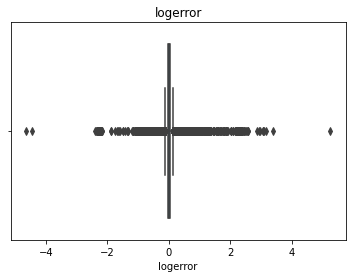

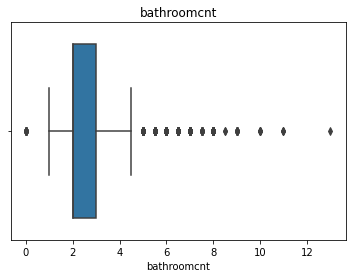

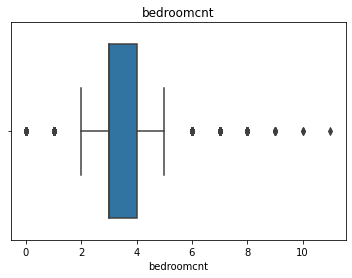

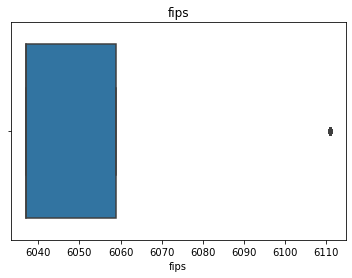

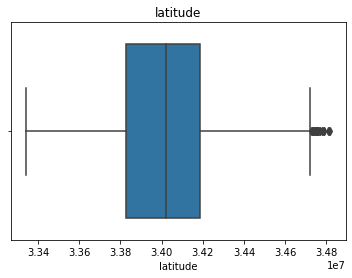

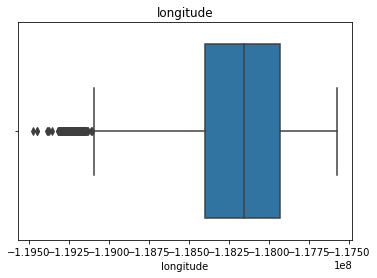

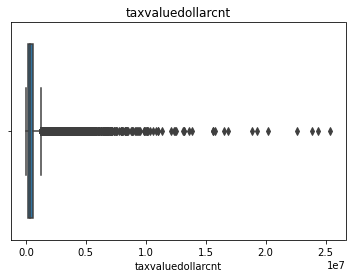

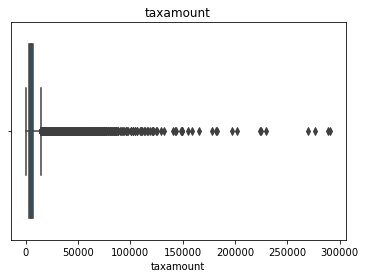

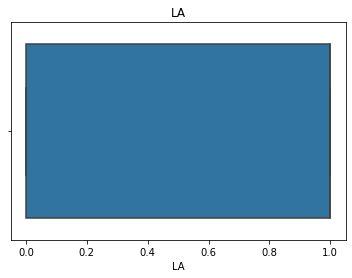

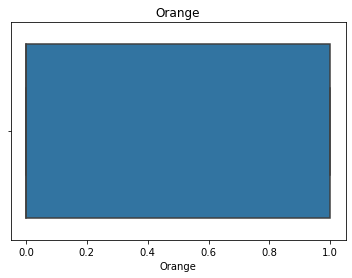

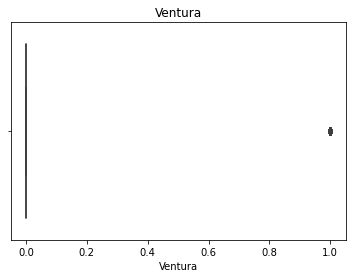

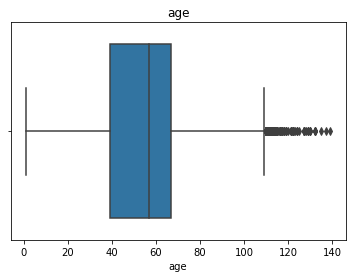

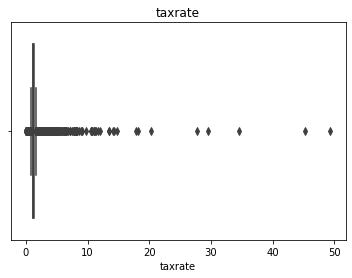

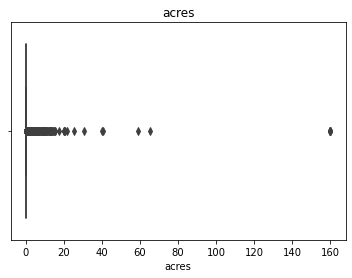

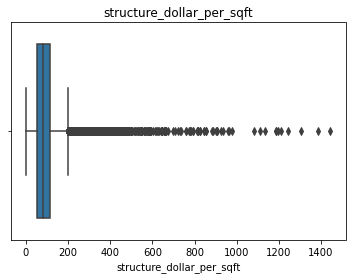

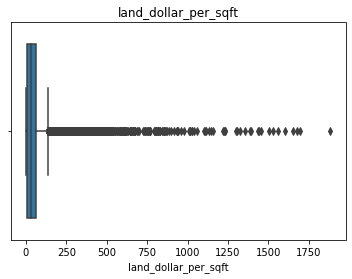

In [20]:
# See what the distributions look like for each column
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [21]:
df.head()

,logerror,bathroomcnt,bedroomcnt,fips,latitude,longitude,taxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft
0,0.025595,3.5,4.0,6059.0,33634931.0,-117869207.0,1023282.0,11013.72,0,1,0,19.0,1.076313,0.103444,156.681613,119.300710
1,0.055619,1.0,2.0,6111.0,34449266.0,-119281531.0,464000.0,5672.48,0,0,1,50.0,1.222517,0.290335,60.068259,29.730371
2,0.005383,2.0,3.0,6059.0,33886168.0,-117823170.0,564778.0,6488.30,0,1,0,55.0,1.148823,0.193572,68.615447,56.865394
3,-0.103410,3.0,4.0,6037.0,34245180.0,-118240722.0,145143.0,1777.51,1,0,0,47.0,1.224661,0.299311,45.840909,2.778417
4,-0.001011,3.0,4.0,6037.0,34145202.0,-118179824.0,773303.0,9516.26,1,0,0,67.0,1.230599,1.446281,93.411209,7.882841


In [22]:
# df = prepare.remove_outliers(df)
# df.describe().T

In [23]:
#Create logerror bins to make pairplots
#Will be easier to see insights and better for visuals
df['logerror_bins'] = pd.cut(df.logerror, [-5, -.2, -.05, .05, .2, 4])

In [24]:
# verify logerror_bins were added
df.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'fips', 'latitude',
       'longitude', 'taxvaluedollarcnt', 'taxamount', 'LA', 'Orange',
       'Ventura', 'age', 'taxrate', 'acres', 'structure_dollar_per_sqft',
       'land_dollar_per_sqft', 'logerror_bins'],
      dtype='object')

### Explore

#### Split data (train, validate, and test split)

Now we'll do our train/validate/test split:

- We'll do exploration and train our model on the train data

- We tune our model on validate, since it will be out-of-sample until we use it.

- And keep the test nice and safe and separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.

In [25]:
train, validate, test = prepare.split_continuous(df)

train -> (28434, 17)
validate -> (12186, 17)
test -> (10155, 17)


In [26]:
train.head()

,logerror,bathroomcnt,bedroomcnt,fips,latitude,longitude,taxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,logerror_bins
41512,-0.014928,2.5,3.0,6111.0,34258777.0,-118738787.0,520113.0,6095.06,0,0,1,21.0,1.171872,0.180005,178.938073,26.532968,"(-0.05, 0.05]"
33370,0.134700,1.5,3.0,6059.0,33725513.0,-117805621.0,160674.0,1679.30,0,1,0,42.0,1.045160,0.024725,75.362158,67.456825,"(0.05, 0.2]"
3593,0.059565,1.0,3.0,6037.0,33888060.0,-118335904.0,255445.0,3486.35,1,0,0,64.0,1.364814,0.131474,53.818989,30.845818,"(0.05, 0.2]"
37533,-0.083418,1.0,3.0,6037.0,33826399.0,-118261242.0,108258.0,1952.03,1,0,0,60.0,1.803128,0.119628,65.909528,7.633468,"(-0.2, -0.05]"
31945,0.014127,2.0,3.0,6037.0,34372784.0,-118558466.0,301571.0,4146.83,1,0,0,43.0,1.375076,0.132805,154.246978,21.253760,"(-0.05, 0.05]"


### Univariate
 - Run a histogram for each column to get to know each column

In [27]:
train.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'fips', 'latitude',
       'longitude', 'taxvaluedollarcnt', 'taxamount', 'LA', 'Orange',
       'Ventura', 'age', 'taxrate', 'acres', 'structure_dollar_per_sqft',
       'land_dollar_per_sqft', 'logerror_bins'],
      dtype='object')

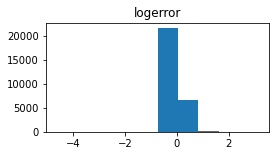

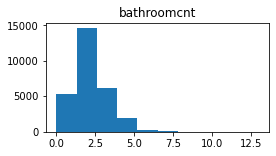

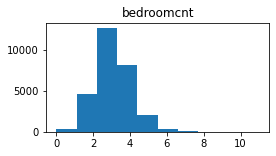

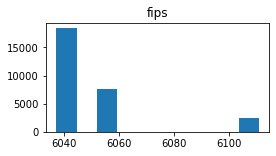

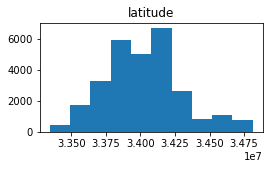

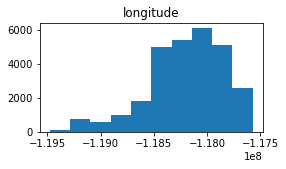

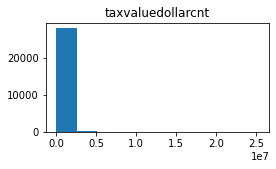

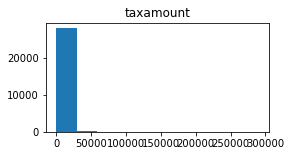

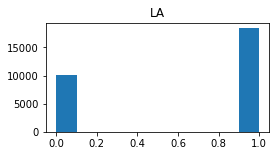

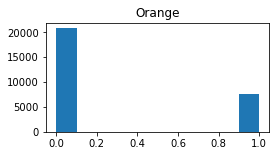

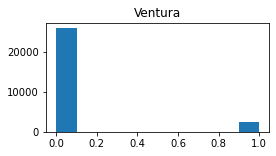

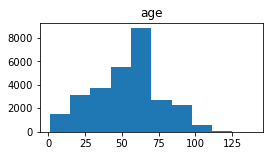

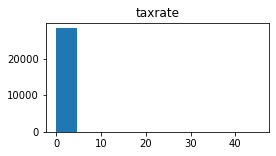

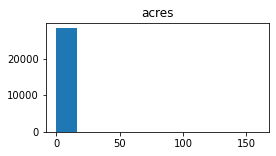

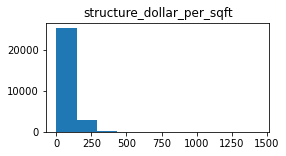

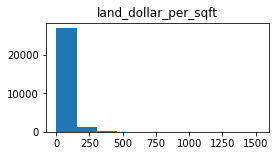

In [28]:
# What is the distribution of each variable?
for col in train.columns:
    if col != 'logerror_bins':
        plt.figure(figsize=(4,2))
        plt.hist(train[col])
        plt.title(col)
        plt.show()

### Bivariate
 - Plot the interaction of a few variables (Square Footage, fips, bedroom count) to see the interaction of each variable with the target

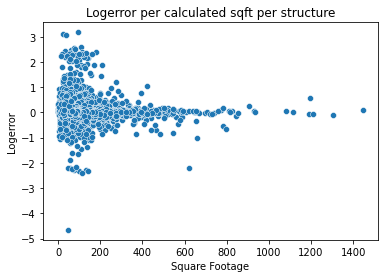

In [29]:
# What is the interaction of the variable with the target (Bivariate)
sns.scatterplot(x= 'structure_dollar_per_sqft', y='logerror', data=train)
plt.title('Logerror per calculated sqft per structure')
plt.xlabel('Square Footage') 
plt.ylabel('Logerror')
plt.show()

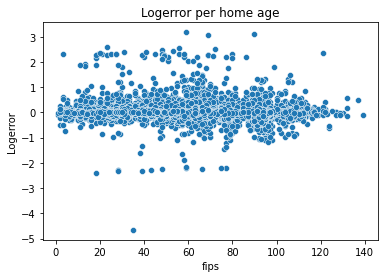

In [30]:
sns.scatterplot(x= 'age', y='logerror', data=train)
plt.title('Logerror per home age')
plt.xlabel('fips') 
plt.ylabel('Logerror')
plt.show()

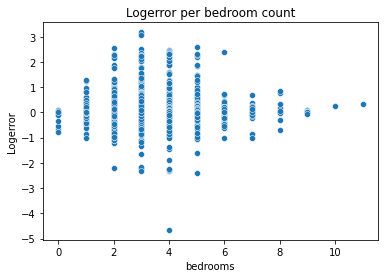

In [31]:
sns.scatterplot(x= 'bedroomcnt', y='logerror', data=train)
plt.title('Logerror per bedroom count')
plt.xlabel('bedrooms') 
plt.ylabel('Logerror')
plt.show()

 #### Takeaway
 The plots do not show that either of the variables used are a direct driver for the logerrors.

### Statistics and correlations
-  run a heatmap of the variables from the DataFrame and check the correlation between them and the logerror
-  run a stats test on the highest correlated variable which was bedroomcnt and structure_dollar_per_sqft

In [32]:
train.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'fips', 'latitude',
       'longitude', 'taxvaluedollarcnt', 'taxamount', 'LA', 'Orange',
       'Ventura', 'age', 'taxrate', 'acres', 'structure_dollar_per_sqft',
       'land_dollar_per_sqft', 'logerror_bins'],
      dtype='object')

In [33]:
# Heatmap for correlation between the whold df and logerror, then another with just a selected few

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

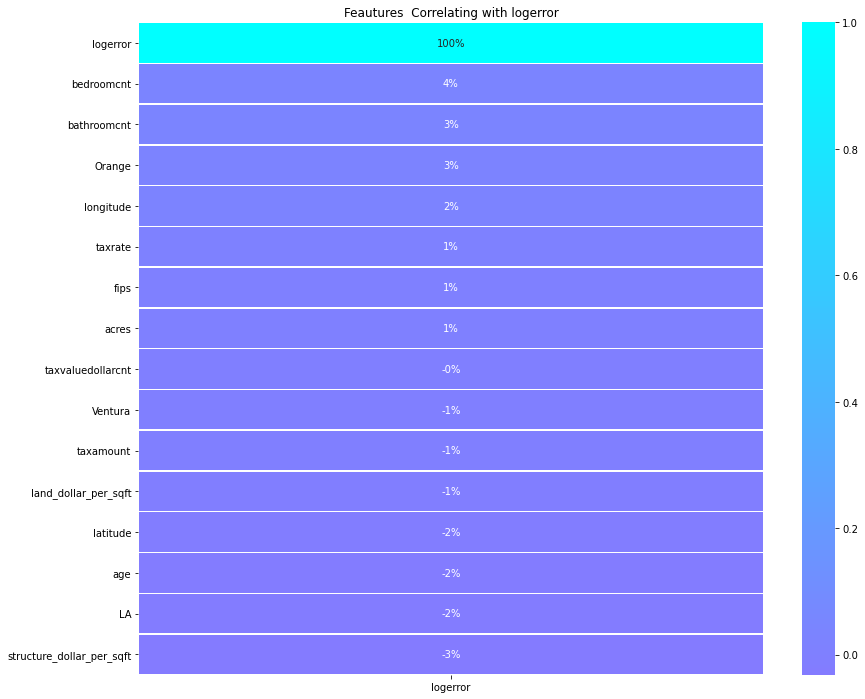

In [34]:
explore.get_heatmap(df, 'logerror', color="cool_r")

In [35]:
col_list = train[['logerror', 'bathroomcnt', 'bedroomcnt', 'structure_dollar_per_sqft', 'age', 'acres']]

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

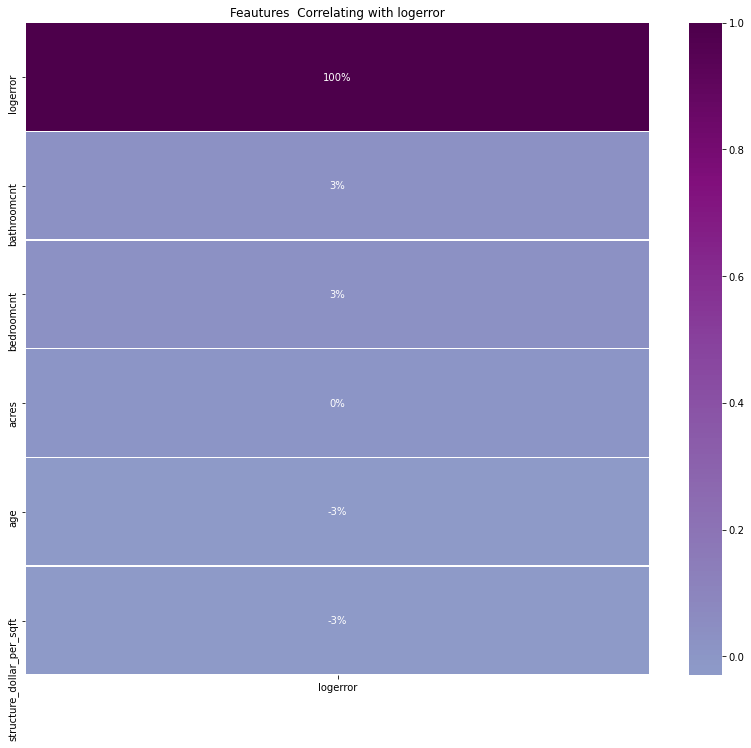

In [36]:
explore.get_heatmap(col_list, 'logerror', color="BuPu")

### Hypothesis testing
 * Run stats tests on structure_collar_per_sqft and bedroomcnt since they both have the highest correlation.

#### age and structure_dollar_per_sqft have the most correlation and since they both are continuous and now I will run a pearson r


${H_0}$ : There is no difference in bedroom count and logerror.

${H_a}$: There is a difference bedroom and logerror.

### Pearson R

In [37]:
corr, p = stats.pearsonr(train.bedroomcnt, train.logerror)
print(corr, p)

0.03078582893629175 2.0779328959696844e-07


In [38]:
alpha= 0.05
null = 'There is no relationship between bedroom count and logerror'
if p < alpha:
    print(f' We reject the null hypothesis,  {null}')
else:
    print(f' We do not reject the null hypothesis, {null}')

 We reject the null hypothesis,  There is no relationship between bedroom count and logerror


In [39]:
corr, p = stats.pearsonr(train.structure_dollar_per_sqft, train.logerror)
print(corr, p)

-0.02935259881914694 7.406226906265324e-07


In [40]:
alpha= 0.05
null = 'There is no relationship between structure_dollar_per_sqft and logerror'
if p < alpha:
    print(f' We reject the null hypothesis,  {null}')
else:
    print(f' We do not reject the null hypothesis, {null}')

 We reject the null hypothesis,  There is no relationship between structure_dollar_per_sqft and logerror


#### Takeaways 
   * The bedroom count and structure dollar per square foot had the highest correlation according to the heatmap
   * However, in the Pearson r test, there was no correlation between either since they were lower than the p value

## Scale
 * Scale the data before clustering

In [41]:
# define independent variables for k-means

X = train[['age', 'acres']]
X.head()

,age,acres
41512,21.0,0.180005
33370,42.0,0.024725
3593,64.0,0.131474
37533,60.0,0.119628
31945,43.0,0.132805


In [42]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

### KMeans

In [43]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

### Cluster 1
 * Age and Acres

In [44]:
# make a new column names cluster in iris and X_scaled dataframe

train['cluster'] = kmeans.predict(X_scaled)

In [45]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[-1.04796225e+00,  2.53235867e-02],
       [ 6.21779865e-01, -2.67212275e-02],
       [-1.27754917e+00,  1.04395769e+02]])

In [46]:
# Make a dataframe 
centroids_scaled  = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,acres
0,-1.047962,0.025324
1,0.621780,-0.026721
2,-1.277549,104.395769


In [47]:
# Centriods for unscaled data?
centroids = train.groupby('cluster')['age', 'acres'].mean()
centroids

,age,acres
cluster,,
0,30.260204,0.284200
1,68.547120,0.205417
2,25.000000,160.032369


In [48]:
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

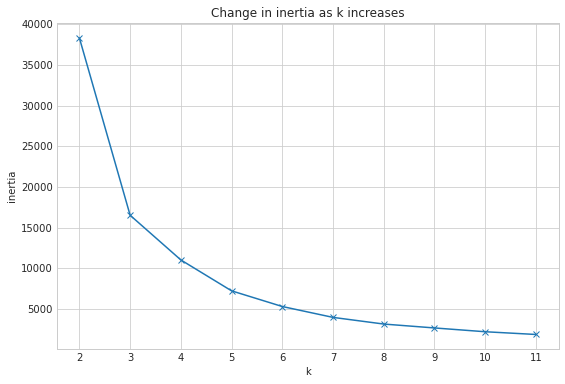

In [49]:
# plot inertia vs k 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

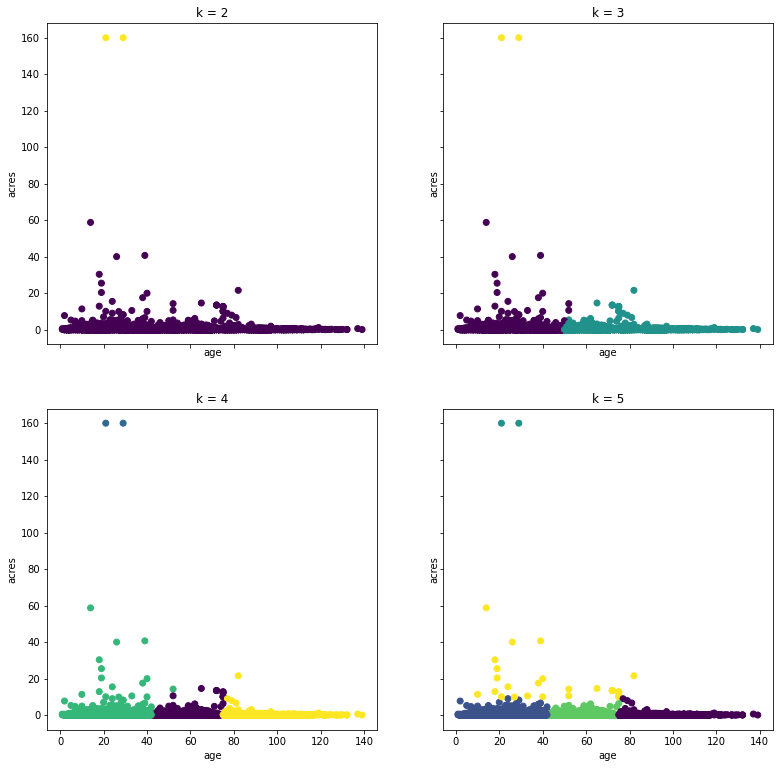

In [50]:
# What value of k is appropriate?  K = 3 would be the best option

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.age, X.acres, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='acres')

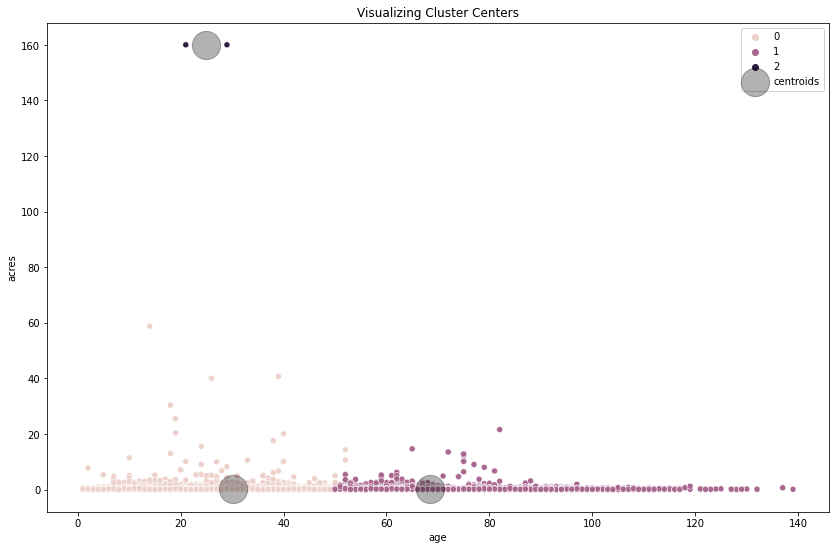

In [51]:
# lets visualize the clusters along with the centers on scaled data for 3 k per inertia above.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y ='acres', data = train, hue = 'cluster')

# plot cluster centers (centroids)
centroids.plot.scatter(x = 'age', y = 'acres',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [52]:
train['fips'].value_counts()

6037.0    18398
6059.0     7589
6111.0     2447
Name: fips, dtype: int64

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

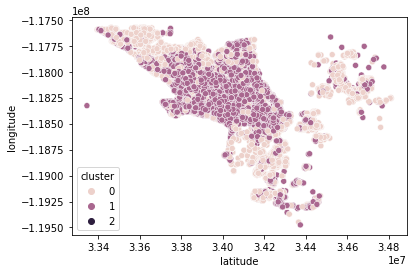

In [53]:
# this is the map of the longitude and latitude showing the clusters based on age and acres
sns.scatterplot(data=train, x='latitude', y='longitude', hue= 'cluster')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

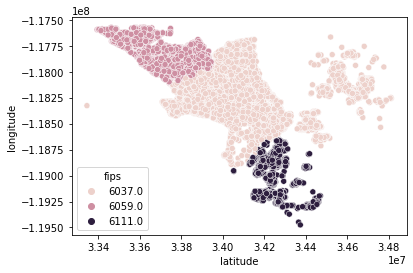

In [54]:
sns.scatterplot(data=train, x='latitude', y='longitude', hue= 'fips')

### Cluster 2
 * Cluster bedroomcnt and bathroomcnt

In [55]:
X2 = train[['bedroomcnt', 'bathroomcnt']]
X2.head(3)

,bedroomcnt,bathroomcnt
41512,3.0,2.5
33370,3.0,1.5
3593,3.0,1.0


In [56]:
# Scale the X2

from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler().fit(X2)
X_scaled2 = pd.DataFrame(scaler.transform(X2), columns= X2.columns).set_index([X2.index.values])

In [57]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled2)

# Use (predict using) the thing 
kmeans.predict(X_scaled2)

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [58]:
# make a new column names cluster in iris and X_scaled dataframe

train['cluster2'] = kmeans.predict(X_scaled2)
train['cluster2']

41512    2
33370    0
3593     0
37533    0
31945    0
        ..
26658    0
10543    0
30238    0
22191    0
21788    0
Name: cluster2, Length: 28434, dtype: int32

In [59]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[-2.24017377,  0.94101629],
       [-2.1696046 ,  2.8845719 ],
       [-2.20454068,  1.73570305]])

In [60]:
# Make a dataframe 
centroids_scaled2  = pd.DataFrame(kmeans.cluster_centers_, columns = X2.columns)
centroids_scaled2

,bedroomcnt,bathroomcnt
0,-2.240174,0.941016
1,-2.169605,2.884572
2,-2.204541,1.735703


In [61]:
# Centriods for unscaled data?
centroids2 = train.groupby('cluster2')['bathroomcnt', 'bedroomcnt'].mean()
centroids2

,bathroomcnt,bedroomcnt
cluster2,,
0,1.686288,2.928299
1,4.661061,4.546356
2,2.902622,3.745318


In [62]:
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

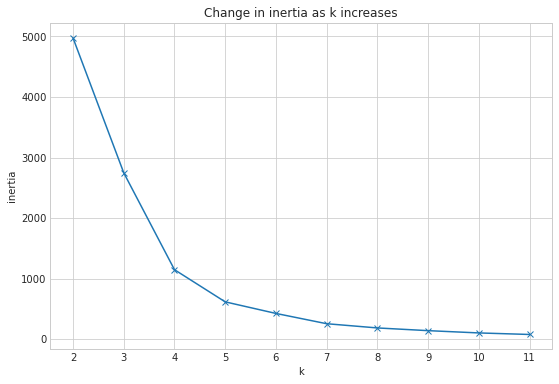

In [63]:
# plot inertia vs k 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

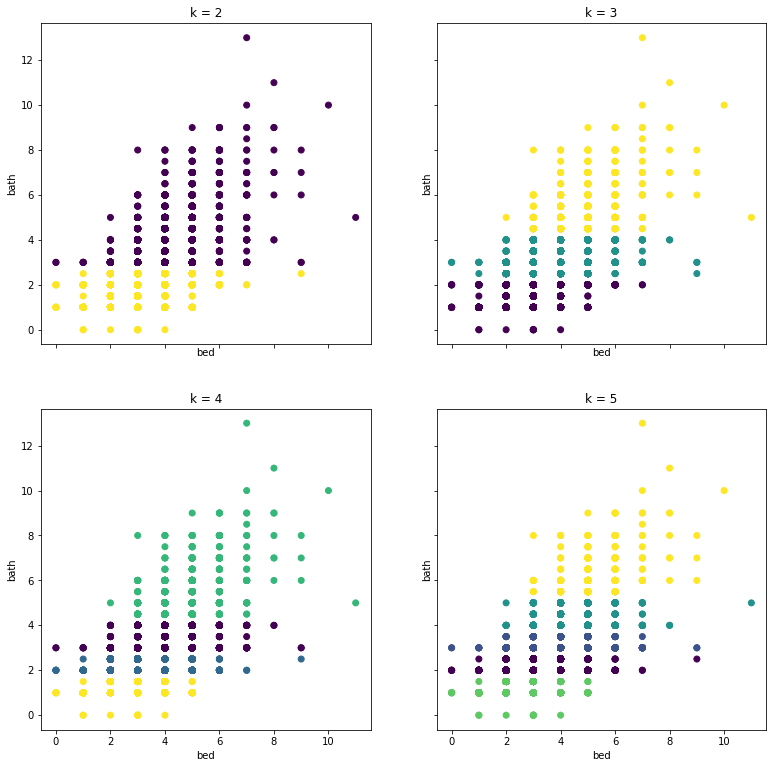

In [64]:
# What value of k is appropriate?  K = 3 would be the best option

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled2).predict(X_scaled2)
    ax.scatter(X2.bedroomcnt, X2.bathroomcnt, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='bed', ylabel='bath')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

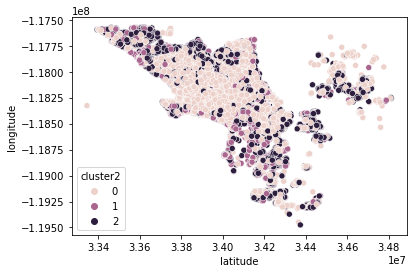

In [65]:
# this is the map of the longitude and latitude showing the clusters based on bedroom count and bathroom count
sns.scatterplot(data=train, x='latitude', y='longitude', hue= 'cluster2')

In [66]:
train[['cluster', 'cluster2']]

,cluster,cluster2
41512,0,2
33370,0,0
3593,1,0
37533,1,0
31945,0,0
...,...,...
26658,1,0
10543,1,0
30238,1,0
22191,0,0


In [67]:
train.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'fips', 'latitude',
       'longitude', 'taxvaluedollarcnt', 'taxamount', 'LA', 'Orange',
       'Ventura', 'age', 'taxrate', 'acres', 'structure_dollar_per_sqft',
       'land_dollar_per_sqft', 'logerror_bins', 'cluster', 'cluster2'],
      dtype='object')

In [68]:
X3 = train[['structure_dollar_per_sqft', 'taxvaluedollarcnt']]
X3.head(3)

,structure_dollar_per_sqft,taxvaluedollarcnt
41512,178.938073,520113.0
33370,75.362158,160674.0
3593,53.818989,255445.0


### Cluster 3
 * Cluster structure_dollar_per_sqft and taxvaluedollarcnt.

In [69]:
# Scale the X3

from sklearn.preprocessing import StandardScaler

scaler3 = StandardScaler().fit(X3)
X_scaled3 = pd.DataFrame(scaler.transform(X3), columns= X3.columns).set_index([X3.index.values])

In [70]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled3)

# Use (predict using) the thing 
kmeans.predict(X_scaled3)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [71]:
# make a new column names cluster in train and X_scaled dataframe

train['cluster3'] = kmeans.predict(X_scaled3)
train['cluster3']

41512    0
33370    0
3593     0
37533    0
31945    0
        ..
26658    0
10543    0
30238    0
22191    0
21788    0
Name: cluster3, Length: 28434, dtype: int32

In [72]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[1.14950631e+00, 2.46963742e+05],
       [5.52694225e+00, 1.17837385e+06],
       [1.29364939e+01, 5.49945130e+06]])

In [73]:
# Make a dataframe 
centroids_scaled3  = pd.DataFrame(kmeans.cluster_centers_, columns = X3.columns)
centroids_scaled3

,structure_dollar_per_sqft,taxvaluedollarcnt
0,1.149506,2.469637e+05
1,5.526942,1.178374e+06
2,12.936494,5.499451e+06


In [74]:
# Centriods for unscaled data?
centroids3 = train.groupby('cluster3')['structure_dollar_per_sqft', 'taxvaluedollarcnt'].mean()
centroids3

,structure_dollar_per_sqft,taxvaluedollarcnt
cluster3,,
0,80.636744,3.777518e+05
1,180.766541,1.800825e+06
2,350.909089,8.417367e+06


In [75]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

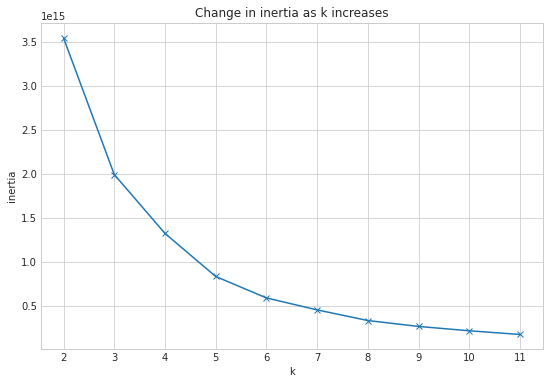

In [76]:
# plot inertia vs k 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

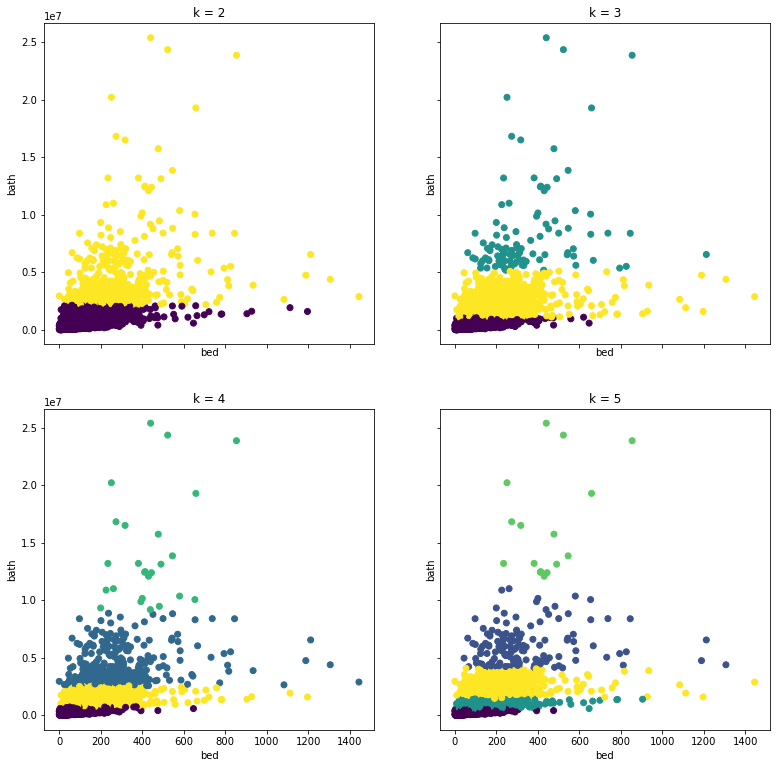

In [77]:
# What value of k is appropriate?  K = 3 would be the best option

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled3).predict(X_scaled3)
    ax.scatter(X3.structure_dollar_per_sqft, X3.taxvaluedollarcnt, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='bed', ylabel='bath')

### Stats testing

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

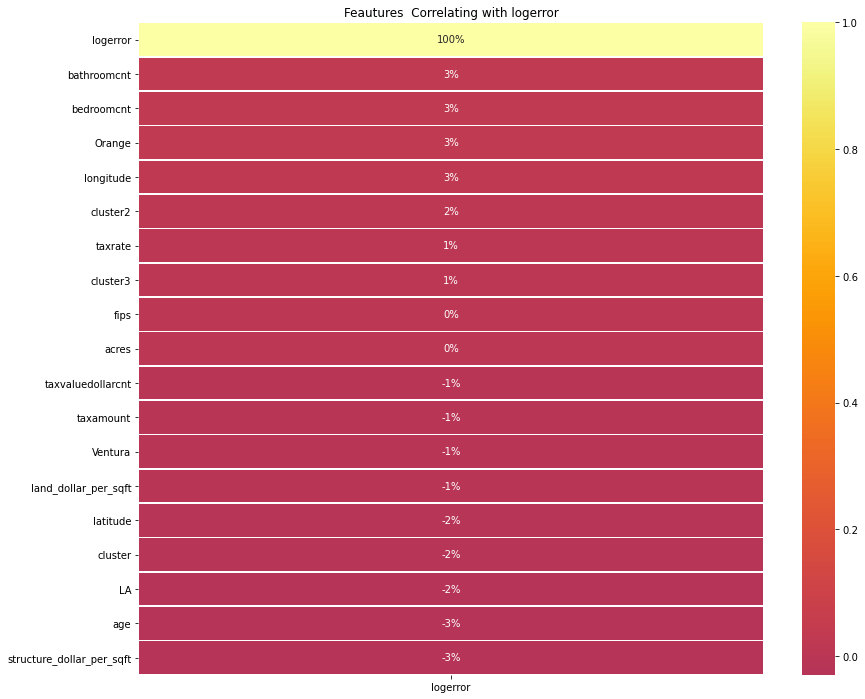

In [78]:
explore.get_heatmap(train, 'logerror',  color = 'inferno')

In [79]:
train.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'fips', 'latitude',
       'longitude', 'taxvaluedollarcnt', 'taxamount', 'LA', 'Orange',
       'Ventura', 'age', 'taxrate', 'acres', 'structure_dollar_per_sqft',
       'land_dollar_per_sqft', 'logerror_bins', 'cluster', 'cluster2',
       'cluster3'],
      dtype='object')

In [80]:
#Creating column list with clusters as part of features
clusters_fts= train[['logerror','bathroomcnt', 'bedroomcnt', 'latitude', 'longitude', 'age', 'acres', 'structure_dollar_per_sqft', 'taxvaluedollarcnt']]

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

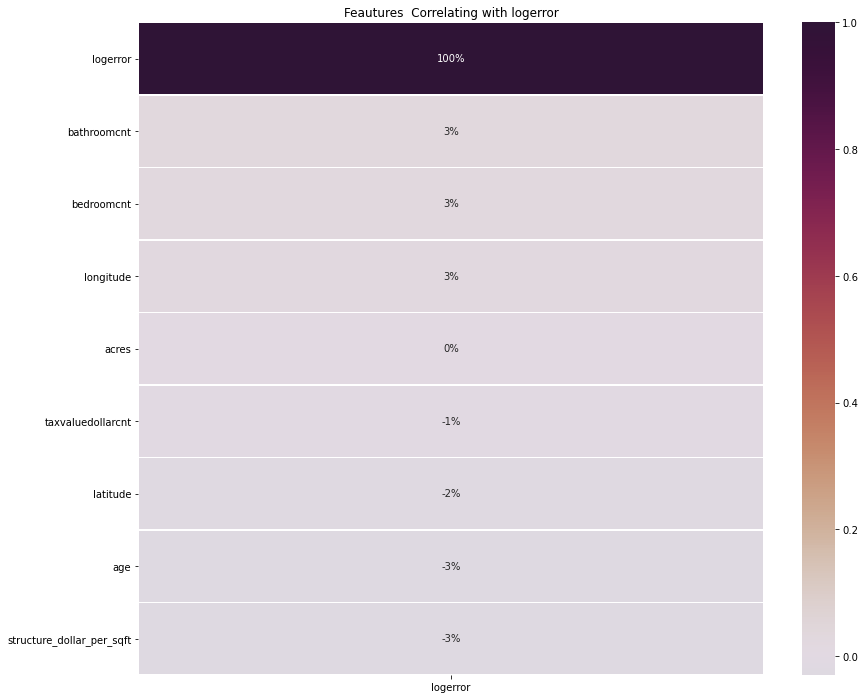

In [81]:
#Looking at correlation heatmap for features listed above
explore.get_heatmap(clusters_fts, 'logerror', color= 'twilight_shifted' )

In [82]:
# Is there a relationship between logerror and bedroomcnt?

In [83]:
corr_clust1, p_clust1= stats.pearsonr(train.logerror, train.cluster)
print(corr_clust1,p_clust1)

-0.01824905481461682 0.002088522434944993


In [84]:
alpha= 0.05

null = 'There is no relationship between logerror and cluster'

if p_clust1 < alpha:
    print(f' we reject the null hypothesis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypothesis,  There is no relationship between logerror and cluster


In [85]:
corr_clust2, p_clust2= stats.pearsonr(train.logerror, train.cluster2)
print(corr_clust2 ,p_clust2)

0.015400815780323644 0.009404615210999681


In [86]:
alpha= 0.05

null = 'There is no relationship between logerror and cluster2'

if p_clust2 < alpha:
    print(f' we reject the null hypothesis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypothesis,  There is no relationship between logerror and cluster2


#### Takeaways 

* There is no relationship between the logerror and the clusters
- Takeaways:
-  Run models using other variables 

## Model

In [87]:
train.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'fips', 'latitude',
       'longitude', 'taxvaluedollarcnt', 'taxamount', 'LA', 'Orange',
       'Ventura', 'age', 'taxrate', 'acres', 'structure_dollar_per_sqft',
       'land_dollar_per_sqft', 'logerror_bins', 'cluster', 'cluster2',
       'cluster3'],
      dtype='object')

In [88]:
# Make sure the target is not in the train
train = train.drop(columns=['logerror', 'logerror_bins'])
train.columns.tolist()

['bathroomcnt',
 'bedroomcnt',
 'fips',
 'latitude',
 'longitude',
 'taxvaluedollarcnt',
 'taxamount',
 'LA',
 'Orange',
 'Ventura',
 'age',
 'taxrate',
 'acres',
 'structure_dollar_per_sqft',
 'land_dollar_per_sqft',
 'cluster',
 'cluster2',
 'cluster3']

In [89]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.train_validate_test(df, 'logerror')

In [90]:
X_train.head()

,bathroomcnt,bedroomcnt,fips,latitude,longitude,taxvaluedollarcnt,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,logerror_bins
41512,2.5,3.0,6111.0,34258777.0,-118738787.0,520113.0,6095.06,0,0,1,21.0,1.171872,0.180005,178.938073,26.532968,"(-0.05, 0.05]"
33370,1.5,3.0,6059.0,33725513.0,-117805621.0,160674.0,1679.30,0,1,0,42.0,1.045160,0.024725,75.362158,67.456825,"(0.05, 0.2]"
3593,1.0,3.0,6037.0,33888060.0,-118335904.0,255445.0,3486.35,1,0,0,64.0,1.364814,0.131474,53.818989,30.845818,"(0.05, 0.2]"
37533,1.0,3.0,6037.0,33826399.0,-118261242.0,108258.0,1952.03,1,0,0,60.0,1.803128,0.119628,65.909528,7.633468,"(-0.2, -0.05]"
31945,2.0,3.0,6037.0,34372784.0,-118558466.0,301571.0,4146.83,1,0,0,43.0,1.375076,0.132805,154.246978,21.253760,"(-0.05, 0.05]"


In [91]:
X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((28434, 16), (28434,), (12186, 16), (12186,), (10155, 16), (10155,))

#### Baseline

In [92]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict logerror_pred_mean
logerror_pred_mean = y_train.logerror.mean()
y_train['logerror_pred_mean'] = logerror_pred_mean
y_validate['logerror_pred_mean'] = logerror_pred_mean

# 2. compute logerror_pred_median
logerror_pred_median = y_train.logerror.median()
y_train['logerror_pred_median'] = logerror_pred_median
y_validate['logerror_pred_median'] = logerror_pred_median

# 3. RMSE of logerror_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean) ** 0.5
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean) ** 0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of logerror_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  0.17 
Validate/Out-of-Sample:  0.18
RMSE using Median
Train/In-Sample:  0.17 
Validate/Out-of-Sample:  0.18


In [93]:
y_train.head()

,logerror,logerror_pred_mean,logerror_pred_median
41512,-0.014928,0.01809,0.00717
33370,0.134700,0.01809,0.00717
3593,0.059565,0.01809,0.00717
37533,-0.083418,0.01809,0.00717
31945,0.014127,0.01809,0.00717


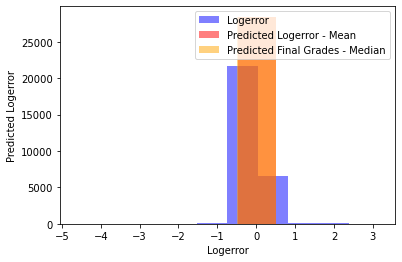

In [94]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.logerror, color='blue', alpha=.5, label="Logerror")
plt.hist(y_train.logerror_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Logerror - Mean")
plt.hist(y_train.logerror_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Final Grades - Median")
plt.xlabel("Logerror")
plt.ylabel("Predicted Logerror")
plt.legend()
plt.show()

In [95]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_mean)}])

In [96]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.177255,0.0


In [97]:
y_train.head(2)

,logerror,logerror_pred_mean,logerror_pred_median
41512,-0.014928,0.01809,0.00717
33370,0.134700,0.01809,0.00717


### Linear Regression - (OLS)

In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28434 entries, 41512 to 21788
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   bathroomcnt                28434 non-null  float64 
 1   bedroomcnt                 28434 non-null  float64 
 2   fips                       28434 non-null  float64 
 3   latitude                   28434 non-null  float64 
 4   longitude                  28434 non-null  float64 
 5   taxvaluedollarcnt          28434 non-null  float64 
 6   taxamount                  28434 non-null  float64 
 7   LA                         28434 non-null  uint8   
 8   Orange                     28434 non-null  uint8   
 9   Ventura                    28434 non-null  uint8   
 10  age                        28434 non-null  float64 
 11  taxrate                    28434 non-null  float64 
 12  acres                      28434 non-null  float64 
 13  structure_dollar_per_sqft  

In [99]:
# X_train list
X1 = ['bathroomcnt', 'bedroomcnt', 'latitude', 'longitude', 'structure_dollar_per_sqft', 'age']
X2 = ['bathroomcnt', 'bedroomcnt', 'latitude', 'longitude', 'age', 'acres', 'structure_dollar_per_sqft']

In [100]:
# create the model object
# 
# make the thing
# 
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm.fit(X_train[X1], y_train.logerror)

# predict train
# 
# use the thing!
# 
y_train['logerror_pred_lm'] = lm.predict(X_train[X1])
# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm) ** (1/2)
# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate[X1])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.17264432087573922 
Validation/Out-of-Sample:  0.17666950633749473


In [101]:
metric_df = metric_df.append(
    {
    'model': 'OLS lm 1', 
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm)}, ignore_index=True)

In [102]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.177255,0.000000
1,OLS lm 1,0.176670,0.003709


### LassoLars

In [103]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train[X1], y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train[X1])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars) ** 0.5

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate[X1])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars) ** 0.5

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.17295565060293686 
Validation/Out-of-Sample:  0.17699730143252648


In [104]:
metric_df = metric_df.append(
    {
    'model': 'LassoLars alpha 1', 
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lars)}, ignore_index=True)

In [105]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.177255,0.000000
1,OLS lm 1,0.176670,0.003709
2,LassoLars alpha 1,0.176997,0.000000


### Polynomial

In [106]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train[X1])

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate[X1])
X_test_degree2 = pf.transform(X_test[X1])

In [107]:
y_train.head(2)

,logerror,logerror_pred_mean,logerror_pred_median,logerror_pred_lm,logerror_pred_lars
41512,-0.014928,0.01809,0.00717,0.005791,0.01809
33370,0.134700,0.01809,0.00717,0.020013,0.01809


In [108]:
# create the model object
# 
# make the thing
# 
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm2.fit(X_train_degree2, y_train.logerror)

LinearRegression(normalize=True)

In [109]:
# predict train
# 
# use the thing!
# 
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)
# evaluate: rmse
rmse_train_poly = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2) ** (1/2)
# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_poly = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.17295565060293686 
Validation/Out-of-Sample:  0.17699730143252648


In [110]:
metric_df = metric_df.append(
    {
    'model': 'Quadratic Model',
    'rmse_validate': rmse_validate_poly,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm2)}, ignore_index=True)

In [111]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,0.177255,0.000000
1,OLS lm 1,0.176670,0.003709
2,LassoLars alpha 1,0.176997,0.000000
3,Quadratic Model,0.176594,0.004559


### Final Summary

#### The goal of identifying the drivers for errors in Zestimates by incorporating clustering methodologies helped, but not by much.

### Key Takeaways
  * I found that the LassoLars model was the closet to the baseline accuracy.
    *  with more time, I would review it further to see if there was any leakage.

With more time: 
 - would re-run the Clustering and models with removing the outliers
 - would like to find if there are better predictors of log error.
 - would like to explore 3-D clustering by adding latitude or acres.
 - explore less common features like a/c unit type and fireplaces.
 - would like to fill out the missing data so that there are even more data points to work with.